<a href="https://colab.research.google.com/github/vikkyanand/Costumer-segmentation/blob/main/Final_Exposis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and File Imports

In [ ]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, boxcox
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read Csv file
dataset = pd.read_csv("/content/drive/MyDrive/exposis project/Mall_Customers.csv")
test=dataset

# Exploratory Data Analysis

In [ ]:
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
dataset.shape

(200, 5)

In [ ]:
# Looking at the datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


 We have a feature 'CustomerID' which is unique to each customer and is of no use in analysis and model building. So drop the coloum

In [ ]:
dataset = dataset.drop('CustomerID', axis=1)
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Check missing values

In [ ]:
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Finding Correlation among the variables

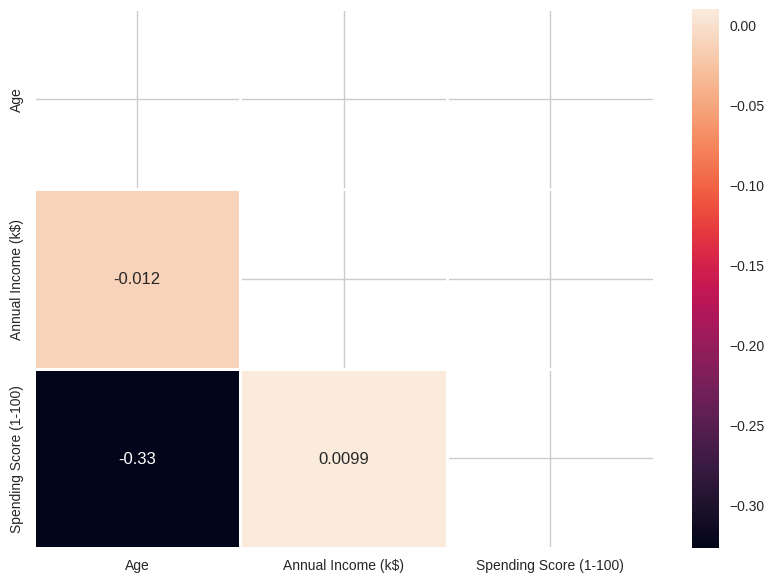

In [ ]:
plt.figure(figsize=(10, 7))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

### Visualization

<Axes: xlabel='Gender', ylabel='count'>

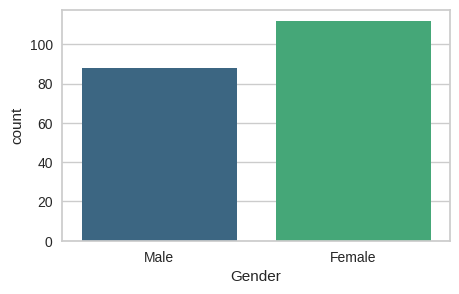

In [ ]:
plt.figure(figsize=(5,3),dpi=100)
sns.countplot(data=dataset, x='Gender', palette='viridis')

<Axes: xlabel='Age', ylabel='count'>

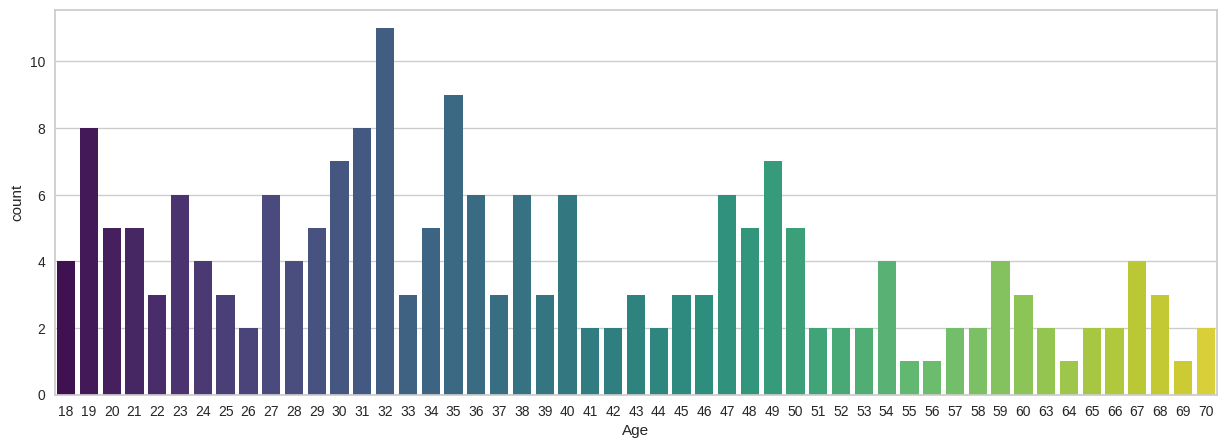

In [ ]:
plt.figure(figsize=(15,5),dpi=100)
sns.countplot(data=dataset, x='Age', palette='viridis')

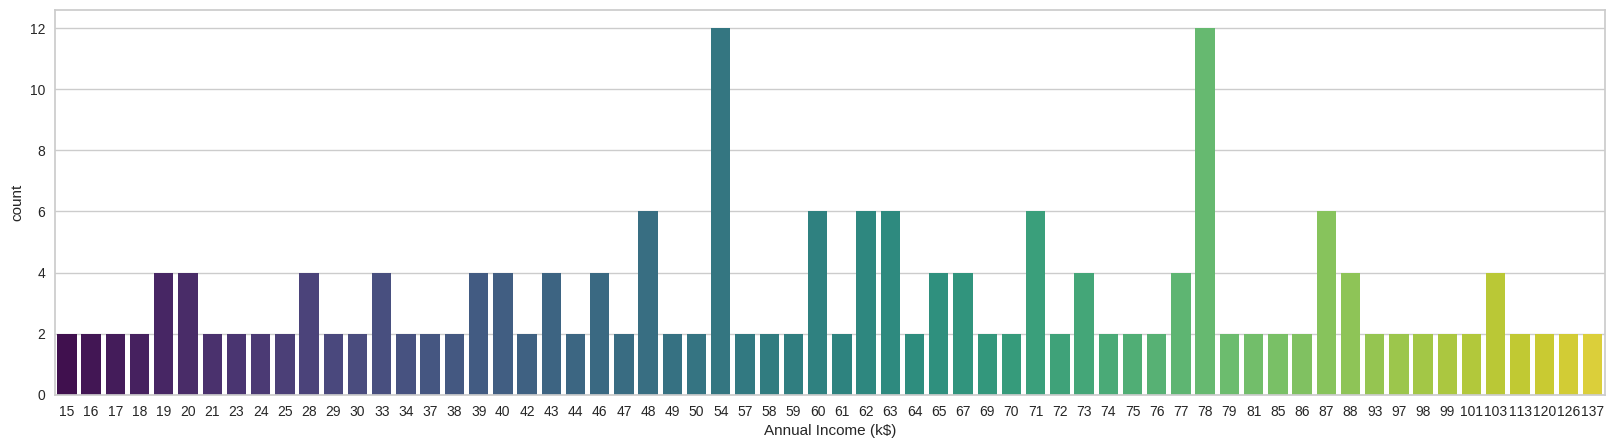

In [ ]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(data=dataset, x='Annual Income (k$)', palette='viridis');

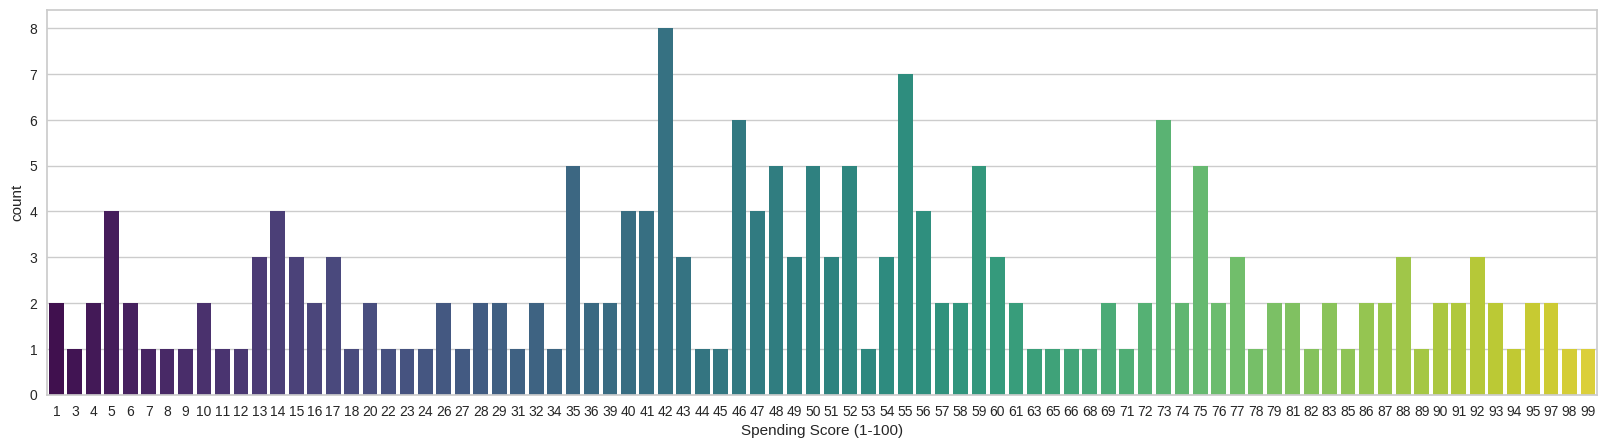

In [ ]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(data=dataset, x='Spending Score (1-100)', palette='viridis');

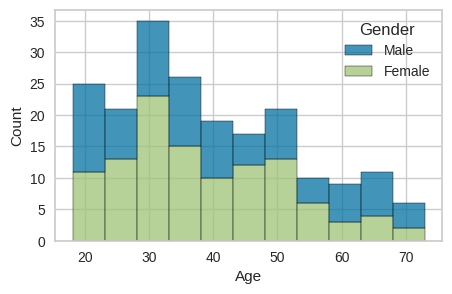

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data=dataset, x='Age', hue='Gender', binwidth=5, multiple='stack');

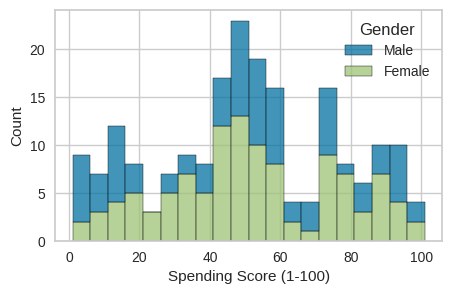

In [ ]:

plt.figure(figsize=(5, 3))
sns.histplot(data=dataset, x='Spending Score (1-100)', hue='Gender', binwidth=5, multiple='stack');

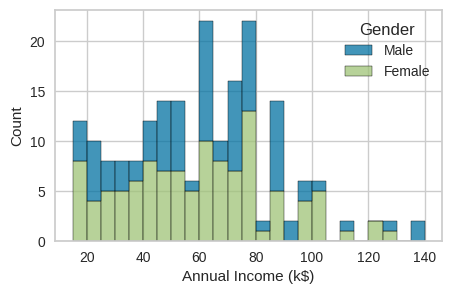

In [ ]:
plt.figure(figsize=(5, 3))

sns.histplot(data=dataset, x='Annual Income (k$)', hue='Gender', binwidth=5, multiple='stack');

In [ ]:
sdat = dataset.groupby(by='Gender')

Plotting Distribution of Males in dataset

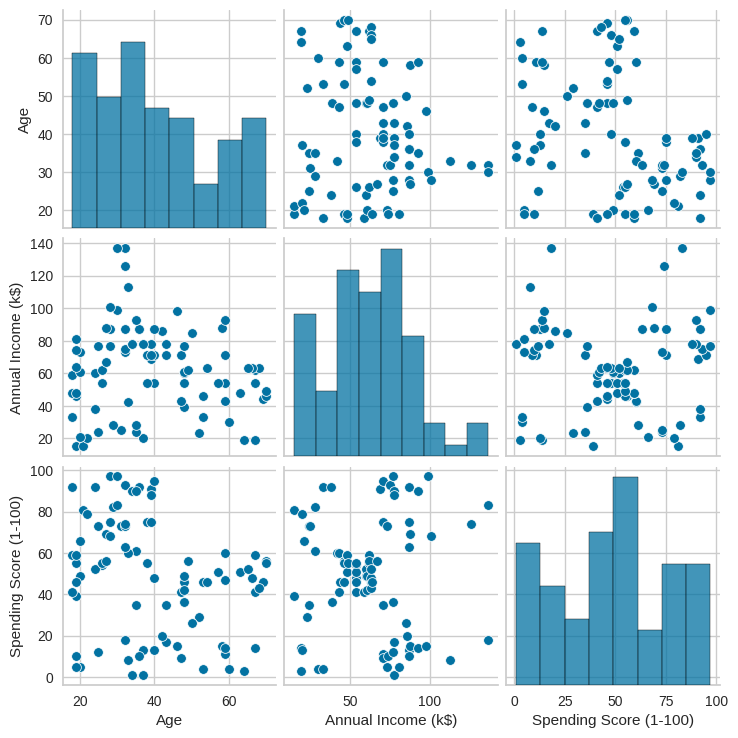

In [ ]:
sns.pairplot(sdat.get_group("Male"));

Plotting Distribution of Females in dataset

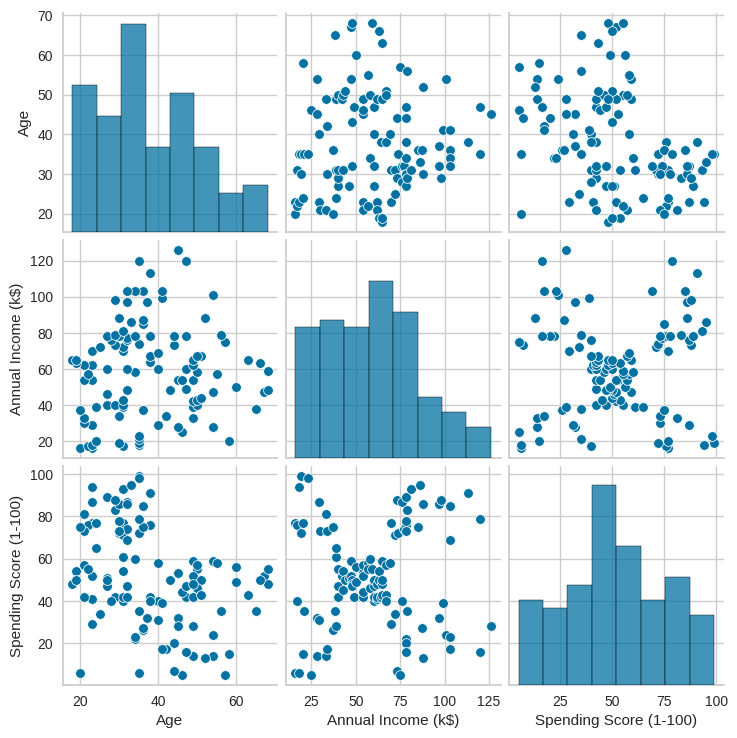

In [ ]:
sns.pairplot(sdat.get_group("Female"));

Different scatterplots between the features.

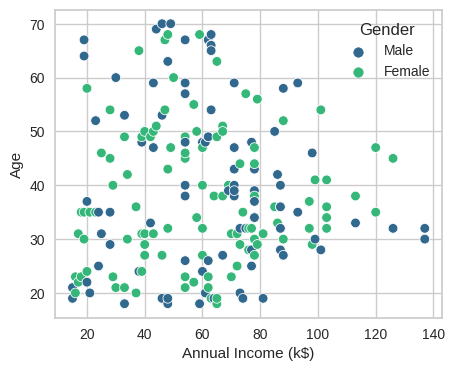

In [ ]:
plt.figure(figsize=(5,4),dpi=100)
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Age', hue='Gender', palette='viridis');

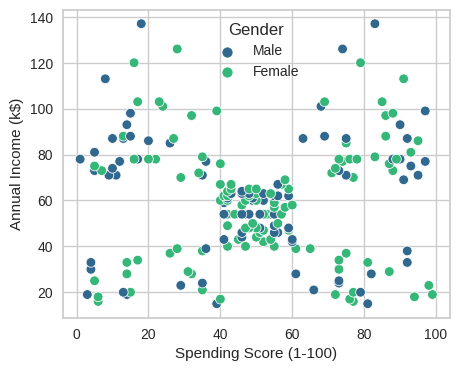

In [ ]:
plt.figure(figsize=(5,4),dpi=100)
sns.scatterplot(data=dataset, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', palette='viridis');

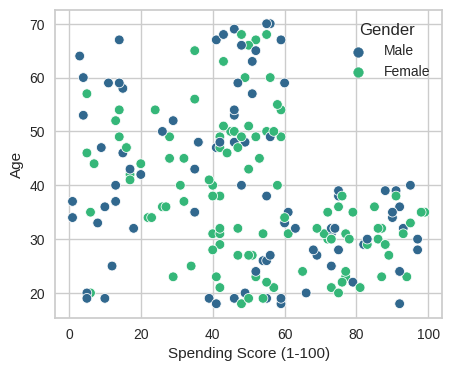

In [ ]:
plt.figure(figsize=(5,4),dpi=100)
sns.scatterplot(data=dataset, x='Spending Score (1-100)', y='Age', hue='Gender', palette='viridis');

## Feature engineering

 Detect and remove outliers

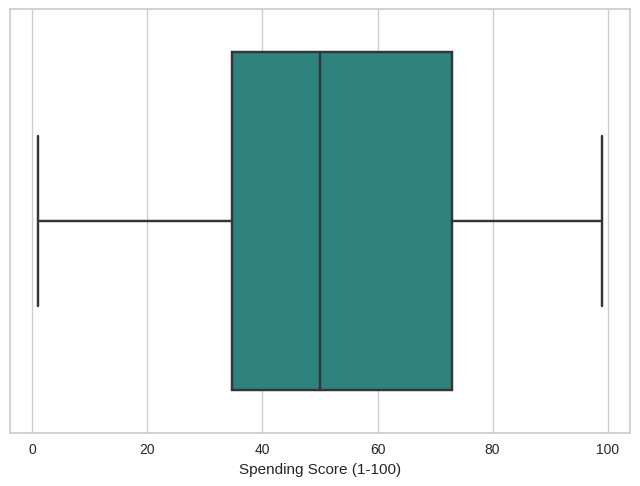

In [ ]:
sns.boxplot(data=dataset, x='Spending Score (1-100)', palette='viridis');

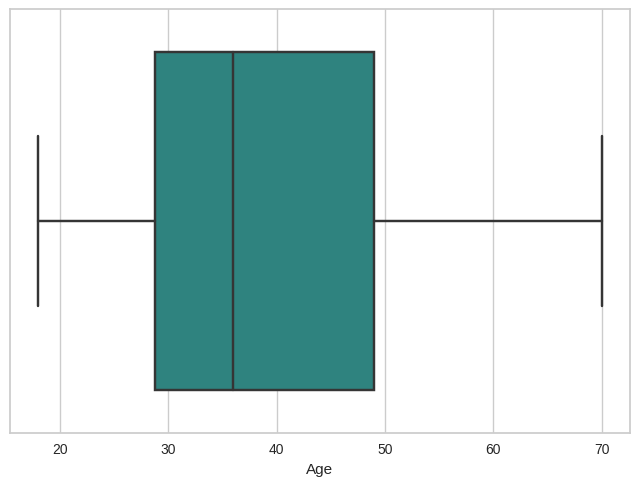

In [ ]:
sns.boxplot(data=dataset, x='Age', palette='viridis');

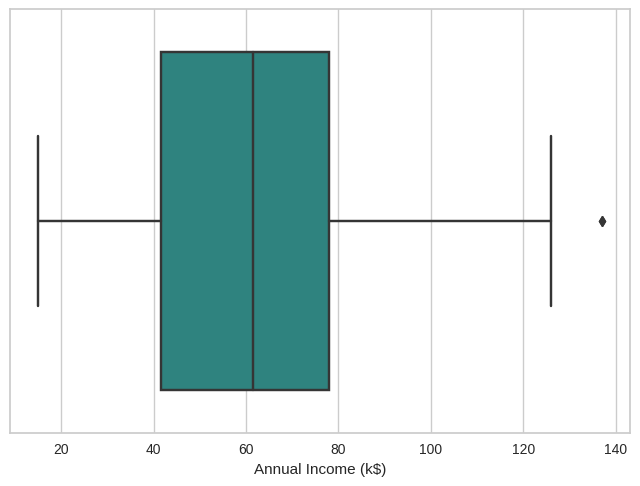

In [ ]:
sns.boxplot(data=dataset, x='Annual Income (k$)', palette='viridis');

There were some outliers . So, have to remove that .

In [ ]:
def remove_outliers(df_final,row):
    percentile25 = df_final[row].quantile(0.25)
    percentile75 = df_final[row].quantile(0.75)
    print(percentile25,percentile75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df_final[row] = pd.DataFrame(np.where(df_final[row] > upper_limit, upper_limit, np.where(df_final[row] < lower_limit, lower_limit, df_final[row])))

In [ ]:
remove_outliers(dataset,'Annual Income (k$)')

41.5 78.0


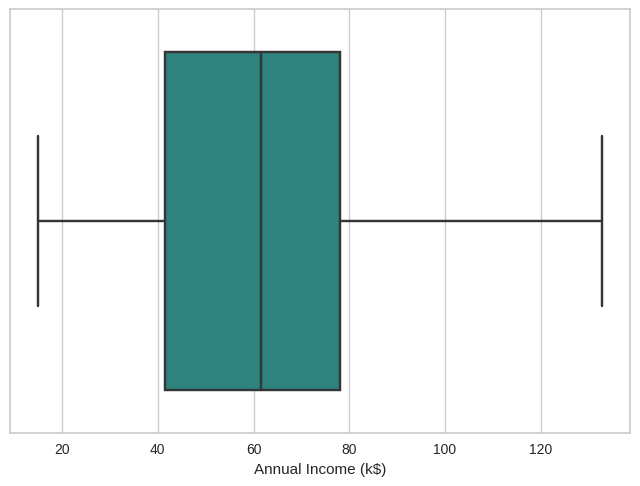

In [ ]:
sns.boxplot(data=dataset, x='Annual Income (k$)', palette='viridis');

**Skewness Correction**

There were some columns with skewness in the dataset. So, trying to correct that Skewness

In [ ]:
def skewnessChecker(columnName):
    print('''Before Correcting''')
    (mu, sigma) = norm.fit(dataset[columnName])
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    sns.distplot(dataset[columnName], fit=norm, color="lightcoral");
    plt.title(columnName.capitalize() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[columnName], plot=plt)
    plt.show()


In [ ]:
def skewnessCorrector(columnName):
    dataset[columnName], lam_fixed_acidity = boxcox(
        dataset[columnName])
    print('''After Correcting''')
    (mu, sigma) = norm.fit(dataset[columnName])
    print("Mu After correcting {} : {}, Sigma After correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.distplot(dataset[columnName], fit=norm, color="lightcoral");
    plt.title(columnName.capitalize() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[columnName], plot=plt)
    plt.show()

Before Correcting
Mu before correcting Age : 38.85, Sigma before correcting Age : 13.934041050606963


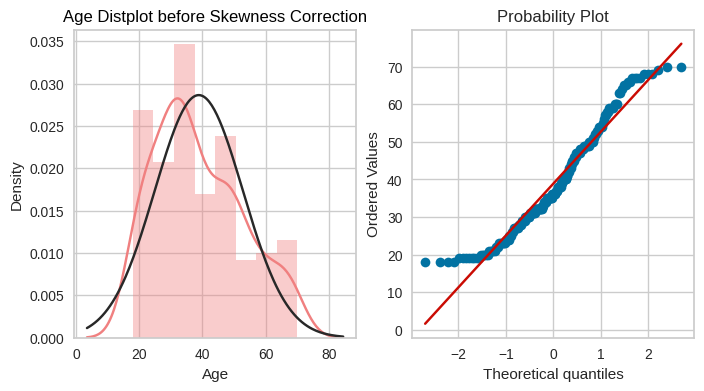

Before Correcting
Mu before correcting Annual income (k$) : 60.5175, Sigma before correcting Annual income (k$) : 26.07810995356067


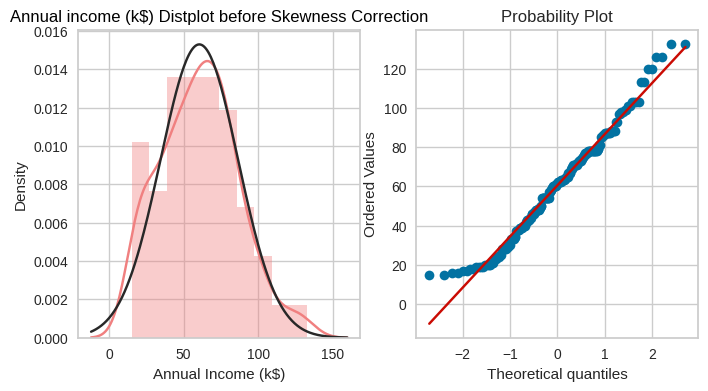

Before Correcting
Mu before correcting Spending score (1-100) : 50.2, Sigma before correcting Spending score (1-100) : 25.7588819633151


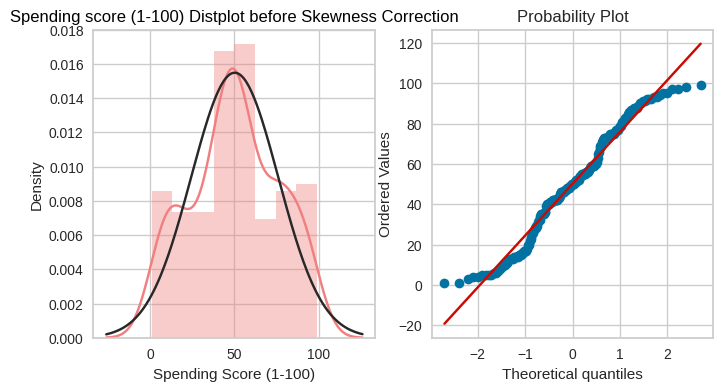

In [ ]:
skewColumnList = ['Age',
                  'Annual Income (k$)', 'Spending Score (1-100)']
for columns in skewColumnList:
    skewnessChecker(columns)

After Correcting
Mu After correcting Age : 4.763488928405746, Sigma After correcting Age : 0.6228165477228914


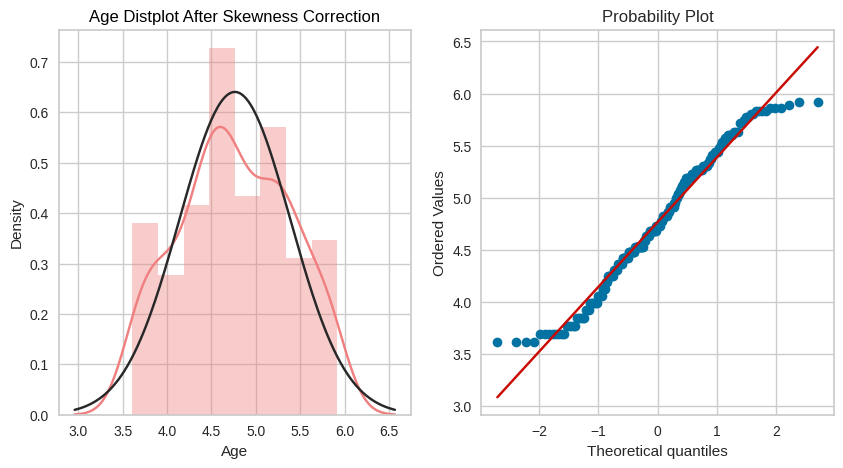

After Correcting
Mu After correcting Annual income (k$) : 20.91267888209026, Sigma After correcting Annual income (k$) : 6.705797240996408


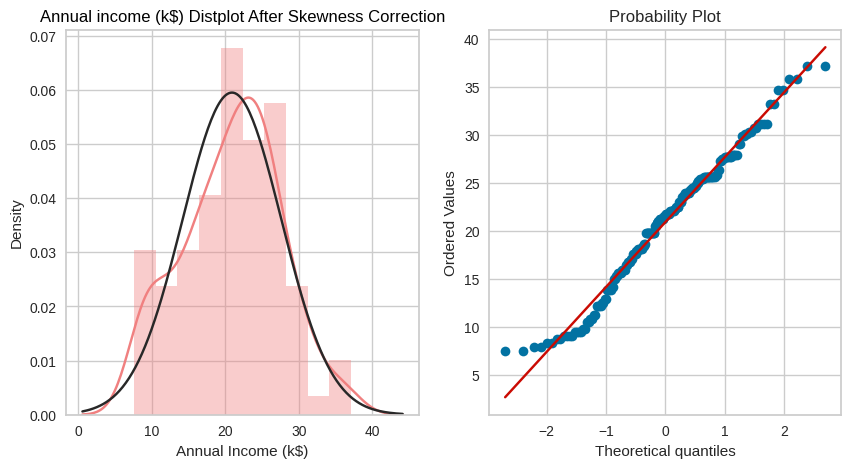

After Correcting
Mu After correcting Spending score (1-100) : 29.35238152869006, Sigma After correcting Spending score (1-100) : 13.765610679735683


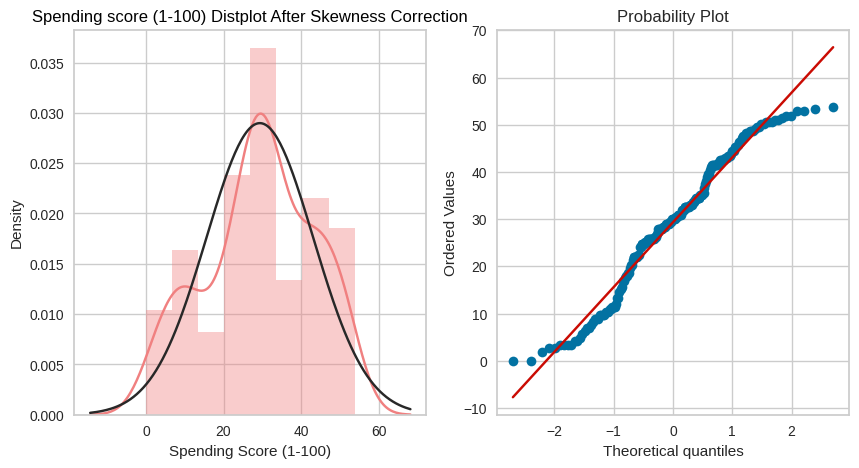

In [ ]:
skewColumnList = ['Age',
                  'Annual Income (k$)', 'Spending Score (1-100)']
for columns in skewColumnList:
    skewnessCorrector(columns)

## Data PreProcessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [ ]:
data_processor = Pipeline([
    ('processing', ColumnTransformer([
            ('gender_encoder', OrdinalEncoder(), ['Gender']),
            ('Spending Score_encoder', StandardScaler(), ['Spending Score (1-100)']),
            ('Annual Income_encoder', StandardScaler(), ['Annual Income (k$)']),
            ('Age_encoder', StandardScaler(), ['Age'])
        ]
    )
    )
])

data_processor

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('gender_encoder',
                                                  OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('Spending Score_encoder',
                                                  StandardScaler(),
                                                  ['Spending Score (1-100)']),
                                                 ('Annual Income_encoder',
                                                  StandardScaler(),
                                                  ['Annual Income (k$)']),
                                                 ('Age_encoder',
                                                  StandardScaler(),
                                                  ['Age'])]))])

In [ ]:
X = data_processor.fit_transform(dataset)
X[0:5]

array([[ 1.        , -0.37947841, -1.98792551, -1.72128917],
       [ 1.        ,  1.16059802, -1.98792551, -1.47083191],
       [ 0.        , -1.83190413, -1.92862004, -1.5933926 ],
       [ 0.        ,  1.02112951, -1.92862004, -1.23993104],
       [ 0.        , -0.34030586, -1.87054958, -0.46006811]])

## Clustering Using Kmeans

In [ ]:
from sklearn.cluster import KMeans

### Using the elbow method to find the optimal number of clusters

Text(0, 0.5, 'Sum of Squared Distances')

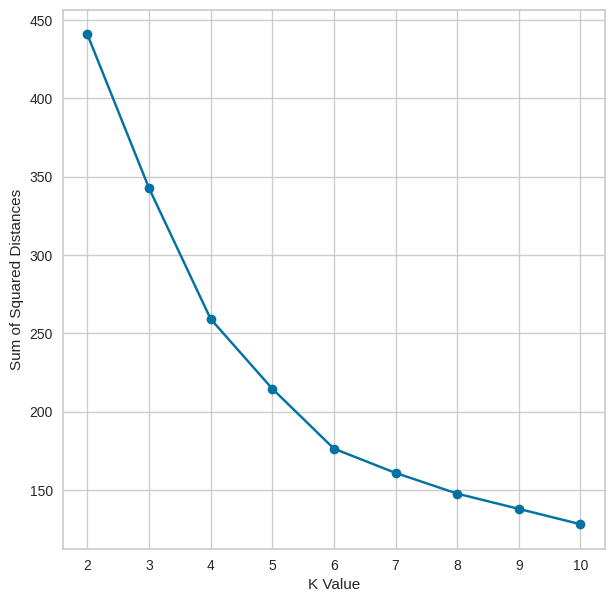

In [ ]:
clusters_range=[2,3,4,5,6,7,8,9,10]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

In [ ]:
kmean_model = KMeans(random_state=0)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

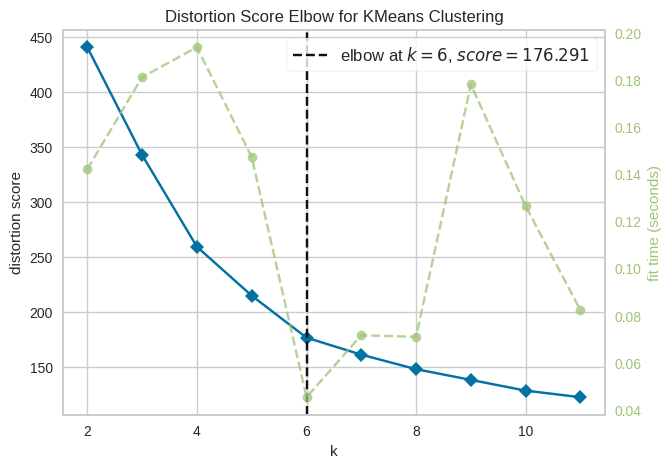

In [ ]:
plt.figure(figsize=(7, 5))

elbow_visualizer = KElbowVisualizer(kmean_model, k=(2, 12))

elbow_visualizer.fit(X)
elbow_visualizer.show();

Elbow method suggests to use 6 clusters.

###silhouette diagrams

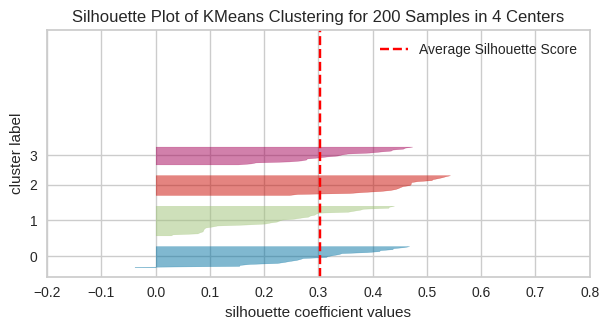

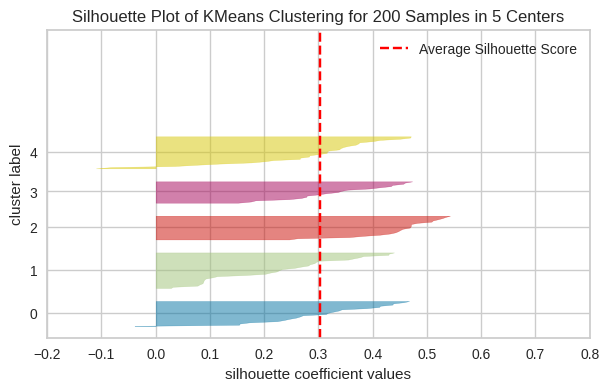

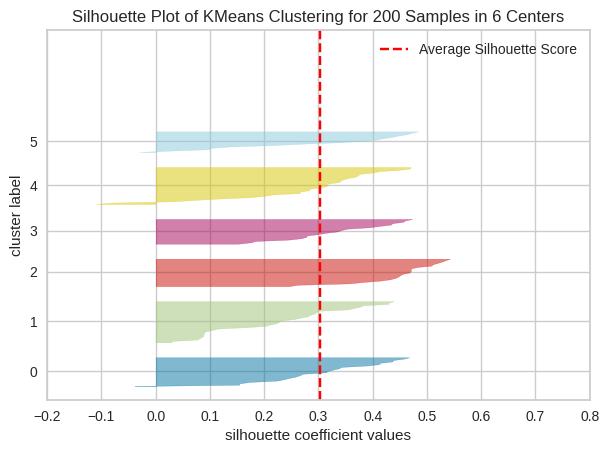

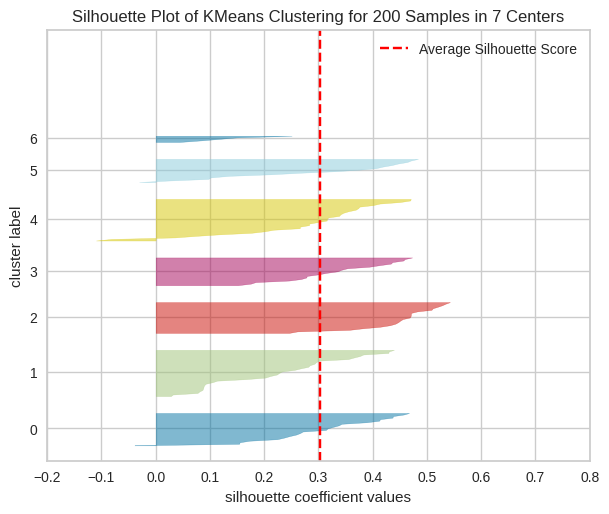

In [ ]:
for idx, n_clusters in enumerate([4,5, 6,7]):
    plt.figure(figsize=(7, n_clusters * .8))

    kmean_model.n_clusters = n_clusters
    silhouette_visualizer = SilhouetteVisualizer(kmean_model, colors='yellowbrick')

    silhouette_visualizer.fit(X);
    silhouette_visualizer.show();

Silhouette diagrams incorporate more information than the elbow plot. Each "blade" on the diagram represents a separate cluster. Height of blades represents number of samples inside of the cluster and width represents strength of inter-cluster connections.
Our goal will be to find clusters of near the same size which are strongly connected.

Hence, we are going to create 5 clusters to generate our segments.

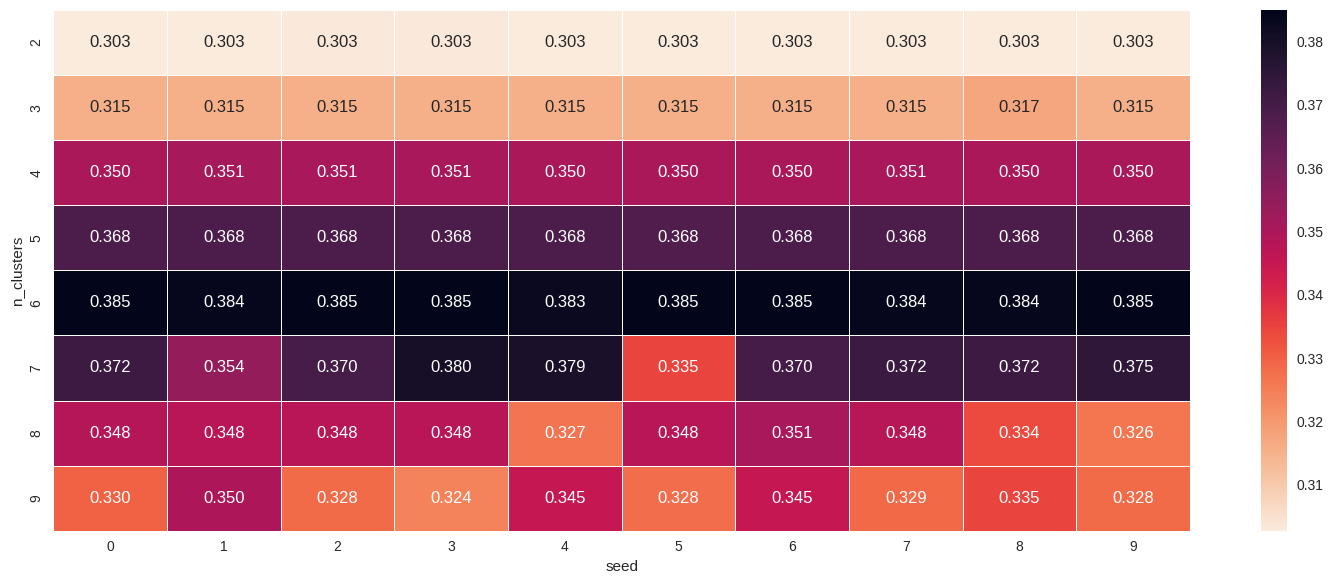

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 10)
random_range  =range(0, 10)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(X)
        silhouette_avg=silhouette_score(X, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [ ]:
model = KMeans(n_clusters=5, init='k-means++',random_state=0)
model.fit(X)

KMeans(n_clusters=5, random_state=0)

In [ ]:
k_means_labels = model.fit_predict(X)
k_means_labels

array([4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

### Cluster Analysis

In [ ]:
import plotly.express as px
fig = px.scatter_3d(dataset, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=model.fit_predict(X),symbol='Gender',  opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))

In [ ]:
test['labels'] = k_means_labels+1
test.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,1
3,4,Female,23,16,77,5
4,5,Female,31,17,40,1


In [ ]:
import plotly.express as px

fig = px.scatter_3d(test, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='labels', opacity=0.75)
fig.show()

In [ ]:
test['labels'] = test['labels'].map({
    1:  'low income & meagre lifestyle', # blue cluster
    2:  'high income & lavish lifestyle', # purple cluster
    3: 'average income & average lifestyle',# red cluster
    4: 'high income & meagre lifestyle', # orange cluster
    5: 'low income & lavish lifestyle'}) # yellow cluster

In [ ]:
test.sample(n=5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
33,34,Male,18,33,92,low income & lavish lifestyle
161,162,Female,29,79,83,high income & lavish lifestyle
45,46,Female,24,39,65,low income & lavish lifestyle
71,72,Female,47,49,42,average income & average lifestyle
17,18,Male,20,21,66,low income & lavish lifestyle
